<a href="https://colab.research.google.com/github/cdefaz/MSCI546/blob/main/DecisionTreeFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Standard Libraries
import numpy as np
import pandas as pd
import random as rn

# Visualization libraries
import pydotplus

# Modeling and Machine Learning
from IPython.display import Image
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
training_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MSCI 546/train.csv')

In [7]:
training_dataset_x = training_dataset.iloc[:,1:].to_numpy()
training_dataset_y = training_dataset['label'].to_numpy()

training_dataset_x = training_dataset_x.reshape(42000, 28, 28)
training_dataset_x = training_dataset_x.astype('float32')
training_dataset_x = training_dataset_x.reshape(-1, 28*28)

trainX, testX, trainY, testY = train_test_split(training_dataset_x, training_dataset_y, test_size=0.2, random_state=1, stratify=training_dataset_y)

In [9]:
num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

accuracies = []
precisions = []
recalls = []
f1s = []

for fold, (train_index, test_index) in enumerate(kf.split(trainX)):
    X_train, X_test = trainX[train_index], trainX[test_index]
    y_train, y_test = trainY[train_index], trainY[test_index]

    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    precision = precision_score(y_test, y_pred, average='weighted')
    precisions.append(precision)
    recall = recall_score(y_test, y_pred, average='weighted')
    recalls.append(recall)
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1s.append(f1)

In [10]:
average_accuracy = sum(accuracies) / num_folds
average_precision = sum(precisions) / num_folds
average_recall = sum(recalls) / num_folds
average_f1 = sum(f1s) / num_folds
print(f"\nAverage accuracy across {num_folds} folds: {average_accuracy:.6f}")
print(f"\nAverage precision across {num_folds} folds: {average_precision:.6f}")
print(f"\nAverage recall across {num_folds} folds: {average_recall:.6f}")
print(f"\nAverage F1 Score across {num_folds} folds: {average_f1:.6f}")


Average accuracy across 5 folds: 0.848095

Average precision across 5 folds: 0.848066

Average recall across 5 folds: 0.848095

Average F1 Score across 5 folds: 0.847888


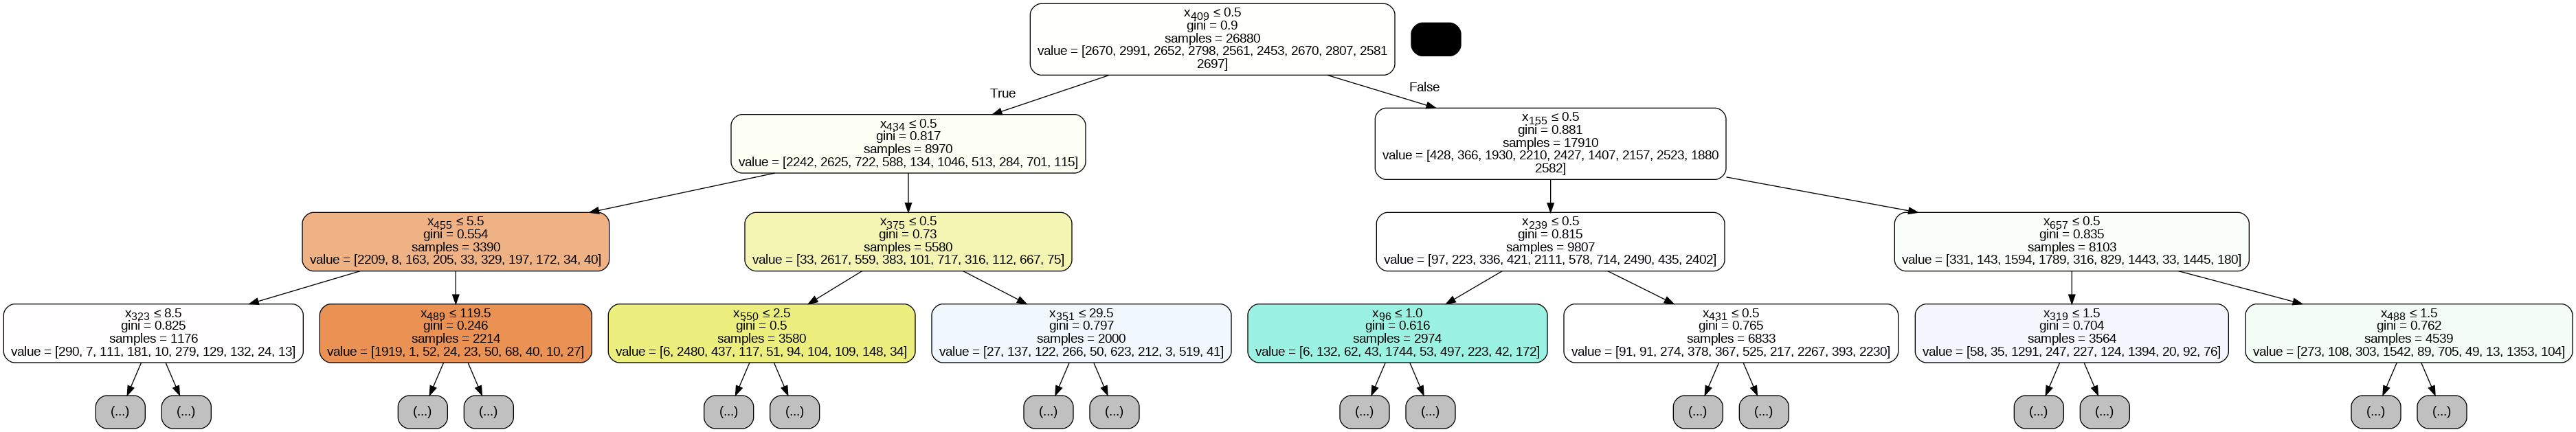

In [11]:
# Convert Decision Tree to visualization
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Create PNG file
Image(graph.create_png())